In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import torch
import numpy as np
import pandas as pd

from notebook_utils import *

In [3]:
all_metrics = {}

In [4]:
strategies_names = ["aleatoric_propagated", "educated_random", "augment_latent", "age","anrmab", "entropy","tta_expected_query_score"]
metrics_dict_cora_gcn = load_results("cora_ml", "gcn", strategies_names, save=True, cached=False, cache_path="../other_data")
all_metrics[("cora_ml", "gcn")] = metrics_dict_cora_gcn

Loading metrics
Saving metrics to cache


In [5]:
strategies_names = ["aleatoric_propagated", "age","anrmab", "entropy"]
metrics_dict_cora_sgc = load_results("cora_ml", "sgc", strategies_names, save=False, cached=False, cache_path="../other_data")
all_metrics[("cora_ml", "sgc")] = metrics_dict_cora_sgc

Loading metrics


In [6]:
for dataset in ["citeseer", "pubmed", "amazon_photos"]:
    for model in ["gcn", "sgc"]:
        strategies_names = ["aleatoric_propagated", "age","anrmab", "entropy"]
        metrics_dict = load_results(dataset, model, strategies_names, save=False, cached=False, cache_path="../other_data")
        all_metrics[(dataset, model)] = metrics_dict

Loading metrics
Loading metrics
Loading metrics
Loading metrics
Loading metrics
Loading metrics


In [7]:
runs = combine_geem_metrics("cora_ml","fmask_emask_200_filter_probs_0.5_0.4")
agg, stds = aggregate_geem_metrics("cora_ml")
all_metrics[("cora_ml", "gcn")]["geem"] = (agg["accuracy/test"], stds["accuracy/test"], agg, runs)
all_metrics[("cora_ml", "sgc")]["geem"] = (agg["accuracy/test"], stds["accuracy/test"], agg, runs)
metrics_dict_cora_gcn["geem"] = (agg["accuracy/test"], stds["accuracy/test"], agg, runs)


In [10]:
df_combineds = {}
for (dataset,model), metrics_dict in all_metrics.items():
    df_combined, df = create_df(metrics_dict)
    df_combineds[(dataset,model)] = (df_combined,df)

df_combined, df = df_combineds[("cora_ml", "gcn")]


In [24]:
ds = [v[0] for k,v in df_combineds.items() if (k[0] == "cora_ml") and (k[1] == "gcn")]
big_cora_df = pd.concat(ds, axis=0)  

In [13]:
def get_count_dict(t):
    ixs = torch.tensor([l[1:] for l in t["acquired_idxs"][:10]]).flatten()
    count = torch.bincount(ixs)
    keys = torch.where(count)
    count_dict = {k.item():count[k].item() for k in keys[0]}
    return count_dict, count,ixs

In [14]:
metrics_dict_cora_gcn.keys()

dict_keys(['aleatoric_propagated_fmask_emask_100_nofilter_probs_0.2_0.1', 'aleatoric_propagated_feature_lr0.01_epochs5_iquery', 'aleatoric_propagated_graph_lra0.1_lrf0.0001_epochs10_iquery', 'aleatoric_propagated_graph_lra0.05_lrf0.0005_epochs50_iquery', 'aleatoric_propagated_fnone_enone_100_nofilter_probs', 'aleatoric_propagated_graph_lra0.01_lrf0.0005_epochs10_iquery', 'aleatoric_propagated_graph_lra0.01_lrf0.001_epochs50_iquery', 'aleatoric_propagated_adj_lr0.05_epochs5_iquery', 'aleatoric_propagated_fnoise_emask_100_filter_probs_0.5_0.3', 'aleatoric_propagated_graph_lra0.05_lrf0.0001_epochs50_iquery', 'aleatoric_propagated_fnone_emask_100_filter_probs_none_0.1', 'aleatoric_propagated_fnoise_enone_100_nofilter_probs_0.6_none', 'aleatoric_propagated_feature_lr0.0001_epochs10_iquery', 'aleatoric_propagated_fnoise_enone_100_filter_probs_0.4_none', 'aleatoric_propagated_graph_lra0.01_lrf0.01_epochs5_iquery', 'aleatoric_propagated_feature_lr0.0005_epochs20_iquery', 'aleatoric_propagated_

In [124]:
key1 = "aleatoric_propagated_None"
key2 = "geem"


count_dict_1, count_1, ixs_1 = get_count_dict(metrics_dict_cora_gcn[key1][3])
# count_dict_1, count_1, ixs_1 = get_count_dict(runs)
print(f"Maximally acquired index: {count_1.argmax()} with {count_1.max()} acquisitions")

count_dict_2, count_2, ixs_2 = get_count_dict(metrics_dict_cora_gcn[key2][3])
print(f"Maximally acquired index: {count_2.argmax()} with {count_2.max()} acquisitions")
print("------")

print(f"Intersection of acquired indices: {len(set(count_dict_1.keys()).intersection(set(count_dict_2.keys())))}")
print(f"Union of acquired indices: {len(set(count_dict_1.keys()).union(set(count_dict_2.keys())))}")
print(f"{key1} acquired indices: {len(count_dict_1)}")
print(f"{key2} acquired indices: {len(count_dict_2)}")

Maximally acquired index: 977 with 8 acquisitions
Maximally acquired index: 1990 with 8 acquisitions
------
Intersection of acquired indices: 15
Union of acquired indices: 331
aleatoric_propagated_None acquired indices: 197
geem acquired indices: 149


In [123]:
[k for k in metrics_dict_cora_gcn.keys() if k.endswith("None")]

['aleatoric_propagated_None', 'age_None', 'anrmab_None', 'entropy_None']

In [36]:
big_cora_df

,0_mean,5_mean,10_mean,15_mean,20_mean,28_mean,0_std,5_std,10_std,15_std,...,0_mean_formatted,5_mean_formatted,10_mean_formatted,15_mean_formatted,20_mean_formatted,28_mean_formatted,nalc,num_acquired_indices,max_acquired,max_acquired_index
geem,39.714286,60.164286,74.664286,78.578572,80.128571,82.171429,8.177869,10.266465,5.058162,3.523058,...,39.7 ± 8.2,60.2 ± 10.3,74.7 ± 5.1,78.6 ± 3.5,80.1 ± 3.4,82.2 ± 1.2,100.000000,149,8,1990
tta_expected_query_score_aleatoric_propagated_fmask_emask_200_filter_0.5_0.4,39.007143,53.192857,65.707143,72.014286,75.335714,78.800000,12.367675,13.331557,9.087090,6.501083,...,39.0 ± 12.4,53.2 ± 13.3,65.7 ± 9.1,72.0 ± 6.5,75.3 ± 4.3,78.8 ± 2.4,92.010621,139,9,1926
aleatoric_propagated_fmask_emask_200_filter_probs_0.5_0.4,39.007143,53.192857,65.707143,72.014286,75.335714,78.800000,12.367675,13.331557,9.087090,6.501083,...,39.0 ± 12.4,53.2 ± 13.3,65.7 ± 9.1,72.0 ± 6.5,75.3 ± 4.3,78.8 ± 2.4,92.010621,139,9,1926
aleatoric_propagated_fmask_emask_200_filter_probs_0.5_0.4_test,39.007143,53.192857,65.707143,72.014286,75.335714,78.800000,12.367675,13.331557,9.087090,6.501083,...,39.0 ± 12.4,53.2 ± 13.3,65.7 ± 9.1,72.0 ± 6.5,75.3 ± 4.3,78.8 ± 2.4,92.010621,139,9,1926
aleatoric_propagated_fmask_emask_2000_filter_probs_0.5_0.4,39.514286,54.614286,67.185714,71.478571,75.128572,78.778572,11.199322,13.443730,10.446569,6.466658,...,39.5 ± 11.2,54.6 ± 13.4,67.2 ± 10.4,71.5 ± 6.5,75.1 ± 4.8,78.8 ± 3.3,92.219646,138,10,2203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aleatoric_propagated_adj_lr0.1_epochs50_iquery,44.521429,56.049999,60.128571,63.364285,62.028571,69.857144,11.630989,8.527016,7.484767,7.318150,...,44.5 ± 11.6,56.0 ± 8.5,60.1 ± 7.5,63.4 ± 7.3,62.0 ± 8.3,69.9 ± 3.8,81.212187,176,8,2290
aleatoric_propagated_graph_lra0.01_lrf0.01_epochs20_iquery,44.978571,58.614285,66.392858,66.585714,68.250000,69.814286,9.781062,9.581189,4.746105,2.397022,...,45.0 ± 9.8,58.6 ± 9.6,66.4 ± 4.7,66.6 ± 2.4,68.2 ± 2.4,69.8 ± 4.2,86.852749,143,8,586
aleatoric_propagated_adj_lr0.01_epochs10_iquery,45.900000,51.414285,60.807142,63.535713,67.721429,69.678572,10.576915,10.705106,7.480777,7.440237,...,45.9 ± 10.6,51.4 ± 10.7,60.8 ± 7.5,63.5 ± 7.4,67.7 ± 4.2,69.7 ± 3.2,82.765935,138,10,2203
aleatoric_propagated_graph_lra0.05_lrf0.01_epochs10_iquery,44.185714,60.135714,67.078571,69.249999,67.771430,69.314286,10.011483,6.890410,4.754664,2.109864,...,44.2 ± 10.0,60.1 ± 6.9,67.1 ± 4.8,69.2 ± 2.1,67.8 ± 1.3,69.3 ± 2.9,86.923973,167,7,586


In [117]:
l = [get_count_dict(metrics_dict_cora_gcn[x][3]) for x in big_cora_df.index]
big_cora_df["num_acquired_indices"] = [len(i[0]) for i in l]
big_cora_df["max_acquired"] = [i[1].max().item() for i in l]
big_cora_df["max_acquired_index"] = [i[1].argmax().item() for i in l]
big_cora_df["strategy"] = [i.split("_")[0] for i in big_cora_df.index]
big_cora_df["tta"] = [True if "probs" in i else False for i in big_cora_df.index]
big_cora_df.loc[(big_cora_df["tta"] == True), "strategy"] = big_cora_df.loc[(big_cora_df["tta"] == True), "strategy"] + "_tta"
big_cora_df.loc[(big_cora_df.index.str.contains("iquery")), "strategy"] = big_cora_df.loc[(big_cora_df.index.str.contains("iquery")), "strategy"] + "_adapted"


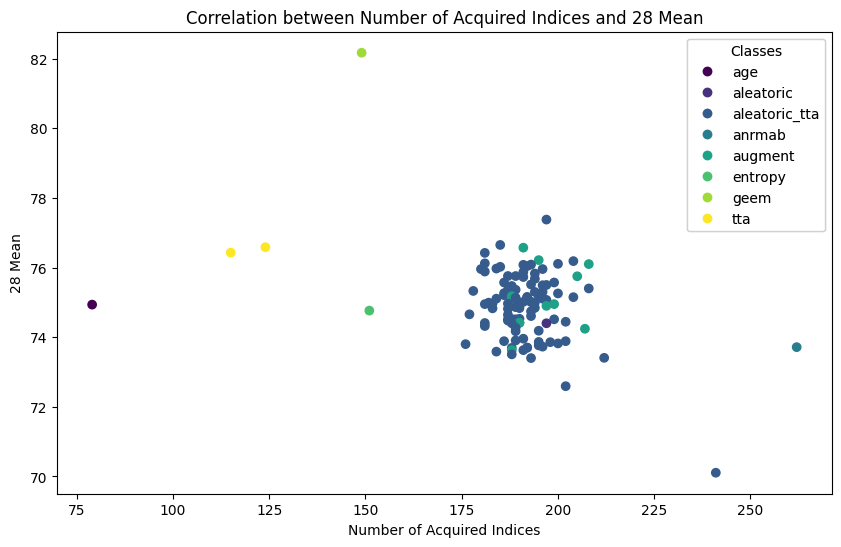

In [121]:
to_plot = big_cora_df[(big_cora_df["strategy"] != "educated") & ~big_cora_df.index.str.contains("iquery") &~big_cora_df.index.str.contains("_filter")  ]
category_mapping = dict(enumerate(to_plot["strategy"].astype("category").cat.categories))
colors = to_plot["strategy"].astype("category").cat.codes

fig, ax = plt.subplots(figsize=(10,6))
scatter = ax.scatter(to_plot["num_acquired_indices"], to_plot["28_mean"], c=colors, cmap="viridis")
plt.xlabel("Number of Acquired Indices")
plt.ylabel("28 Mean")
plt.title("Correlation between Number of Acquired Indices and 28 Mean")

l = [ category_mapping[i] for i in range(len(category_mapping)) ]
handles, labels = scatter.legend_elements()
legend1 = ax.legend(handles=handles, labels=l, loc="best", title="Classes") 
ax.add_artist(legend1)
plt.show()

<Axes: ylabel='Frequency'>

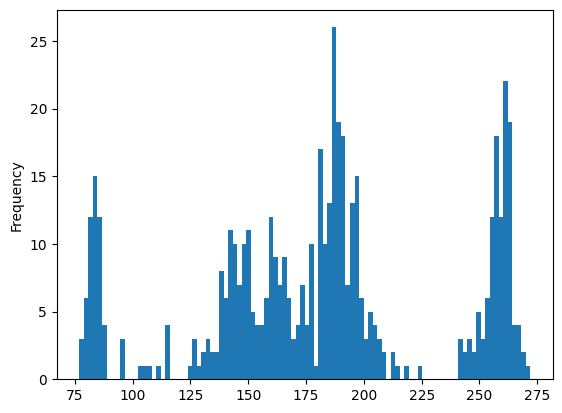

In [42]:
big_cora_df["num_acquired_indices"].plot(kind="hist", bins=100)

In [26]:
d = []
for k,v in metrics_dict_cora_gcn.items():
    cd, c, i = get_count_dict(v[3])
    d.append([k,len(cd), c.max().item(), c.argmax().item()])

count_dict_df = pd.DataFrame(d, columns=["key", "num_acquired_indices", "max_acquisitions", "max_acquisition_index"])
count_dict_df.sort_values(by="num_acquired_indices", ascending=True, inplace=True)
count_dict_df

,key,num_acquired_indices,max_acquisitions,max_acquisition_index
472,age_fnoise_emask_100_filter_probs_0.1_0.3_42,77,10,33
437,age_fmask_emask_100_filter_probs_0.4_0.2,78,10,33
469,age_fnoise_emask_100_filter_probs_0.1_0.1_42,78,10,33
480,age_fnoise_emask_100_filter_probs_0.5_0.5_42,79,10,33
440,age_None,79,10,89
...,...,...,...,...
321,educated_random_aleatoric_propagated_fmask_ema...,268,2,28
346,educated_random_aleatoric_propagated_fmask_ema...,268,3,320
360,educated_random_aleatoric_propagated_fmask_ema...,269,2,64
364,educated_random_aleatoric_propagated_20_0,269,3,2686


In [ ]:
count_dict, count, ixs =  get_count_dict(metrics_dict_cora_gcn[key1][3])

plt.hist(list(count_dict.values()), bins=100)
plt.show()